In [129]:
#Dependancies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [130]:
df_a = pd.read_csv("./Resources/tech_layoffs.csv")

df_a

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,1171,Google,San Francisco Bay Area,USA,North America,12000,2023-01-20 00:00:00 UTC,6.000000,200000,188000,Consumer,Post-IPO,$26,2023,37.38605,-122.08385
1,1654,Meta,San Francisco Bay Area,USA,North America,11000,2022-11-09 00:00:00 UTC,13.000000,84615,73615,Consumer,Post-IPO,$26000,2022,37.45383,-122.18219
2,846,Meta,San Francisco Bay Area,USA,North America,10000,2023-03-14 00:00:00 UTC,13.584117,73615,63615,Consumer,Post-IPO,$26000,2023,37.45383,-122.18219
3,1204,Microsoft,Seattle,USA,North America,10000,2023-01-18 00:00:00 UTC,5.000000,200000,190000,Other,Post-IPO,$1,2023,47.60621,-122.33207
4,1586,Amazon,Seattle,USA,North America,10000,2022-11-16 00:00:00 UTC,3.000000,333333,323333,Retail,Post-IPO,$108,2022,47.60621,-122.33207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,2913,TutorMundi,Sao Paulo,Brazil,South America,4,2020-04-24 00:00:00 UTC,100.000000,4,0,Education,Series A,$2,2020,-23.54750,-46.63611
1414,3039,Spyce,Boston,USA,North America,4,2020-04-08 00:00:00 UTC,12.000000,33,29,Food,Series A,$26,2020,42.35843,-71.05977
1415,3261,Flytedesk,Boulder,USA,North America,4,2020-03-18 00:00:00 UTC,20.000000,20,16,Marketing,Seed,$4,2020,40.01499,-105.27055
1416,447,FrontRow,Bengaluru,India,Asia,4,2023-07-10 00:00:00 UTC,100.000000,4,0,Education,Series A,$17,2023,12.97194,77.59369


In [131]:
#Sort By 'Laid_off'
df_a = df_a.sort_values(by=['Laid_Off'], ascending=False)

df_a

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,1171,Google,San Francisco Bay Area,USA,North America,12000,2023-01-20 00:00:00 UTC,6.000000,200000,188000,Consumer,Post-IPO,$26,2023,37.38605,-122.08385
1,1654,Meta,San Francisco Bay Area,USA,North America,11000,2022-11-09 00:00:00 UTC,13.000000,84615,73615,Consumer,Post-IPO,$26000,2022,37.45383,-122.18219
2,846,Meta,San Francisco Bay Area,USA,North America,10000,2023-03-14 00:00:00 UTC,13.584117,73615,63615,Consumer,Post-IPO,$26000,2023,37.45383,-122.18219
3,1204,Microsoft,Seattle,USA,North America,10000,2023-01-18 00:00:00 UTC,5.000000,200000,190000,Other,Post-IPO,$1,2023,47.60621,-122.33207
4,1586,Amazon,Seattle,USA,North America,10000,2022-11-16 00:00:00 UTC,3.000000,333333,323333,Retail,Post-IPO,$108,2022,47.60621,-122.33207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,2913,TutorMundi,Sao Paulo,Brazil,South America,4,2020-04-24 00:00:00 UTC,100.000000,4,0,Education,Series A,$2,2020,-23.54750,-46.63611
1414,3039,Spyce,Boston,USA,North America,4,2020-04-08 00:00:00 UTC,12.000000,33,29,Food,Series A,$26,2020,42.35843,-71.05977
1415,3261,Flytedesk,Boulder,USA,North America,4,2020-03-18 00:00:00 UTC,20.000000,20,16,Marketing,Seed,$4,2020,40.01499,-105.27055
1416,447,FrontRow,Bengaluru,India,Asia,4,2023-07-10 00:00:00 UTC,100.000000,4,0,Education,Series A,$17,2023,12.97194,77.59369


In [132]:
# Drop all non USA countries
df_usa = df_a[df_a['Country'] == 'USA']

df_usa

,#,Company,Location_HQ,Country,Continent,Laid_Off,Date_layoffs,Percentage,Company_Size_before_Layoffs,Company_Size_after_layoffs,Industry,Stage,Money_Raised_in_$_mil,Year,lat,lng
0,1171,Google,San Francisco Bay Area,USA,North America,12000,2023-01-20 00:00:00 UTC,6.000000,200000,188000,Consumer,Post-IPO,$26,2023,37.38605,-122.08385
1,1654,Meta,San Francisco Bay Area,USA,North America,11000,2022-11-09 00:00:00 UTC,13.000000,84615,73615,Consumer,Post-IPO,$26000,2022,37.45383,-122.18219
2,846,Meta,San Francisco Bay Area,USA,North America,10000,2023-03-14 00:00:00 UTC,13.584117,73615,63615,Consumer,Post-IPO,$26000,2023,37.45383,-122.18219
3,1204,Microsoft,Seattle,USA,North America,10000,2023-01-18 00:00:00 UTC,5.000000,200000,190000,Other,Post-IPO,$1,2023,47.60621,-122.33207
4,1586,Amazon,Seattle,USA,North America,10000,2022-11-16 00:00:00 UTC,3.000000,333333,323333,Retail,Post-IPO,$108,2022,47.60621,-122.33207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412,3157,DialSource,Sacramento,USA,North America,5,2020-03-31 00:00:00 UTC,14.000000,36,31,Marketing,Series B,$26,2020,38.58157,-121.49440
1409,1992,Woven,Indianapolis,USA,North America,5,2022-08-16 00:00:00 UTC,15.000000,33,28,HR,Series A,$11,2022,39.76838,-86.15804
1414,3039,Spyce,Boston,USA,North America,4,2020-04-08 00:00:00 UTC,12.000000,33,29,Food,Series A,$26,2020,42.35843,-71.05977
1415,3261,Flytedesk,Boulder,USA,North America,4,2020-03-18 00:00:00 UTC,20.000000,20,16,Marketing,Seed,$4,2020,40.01499,-105.27055


In [133]:
# compare companies with most layoff
# take top 5 companies compared to rest of the industry

# rename SaleSan Franciscoorce
df_usa.loc[df_usa['Company'] == 'SaleSan Franciscoorce', 'Company'] = 'Salesforce'

# groupby Company Layoffs
company_layoffs = df_usa.groupby('Company')['Laid_Off'].sum()
company_size_before = df_usa.groupby('Company')['Company_Size_before_Layoffs'].sum()
company_size_after = df_usa.groupby('Company')['Company_Size_after_layoffs'].sum()
usa_top_5_layoffs = company_layoffs.nlargest(5)
rest_companies = company_layoffs.drop(usa_top_5_layoffs.index)
rest_layoffs = rest_companies.sum()

top_5_size_before = company_size_before.loc[usa_top_5_layoffs.index]
top_5_size_after = company_size_after.loc[usa_top_5_layoffs.index]

# Get median values for rest of the companies
rest_size_before = company_size_before.loc[rest_companies.index].median()
rest_size_after = company_size_after.loc[rest_companies.index].median()

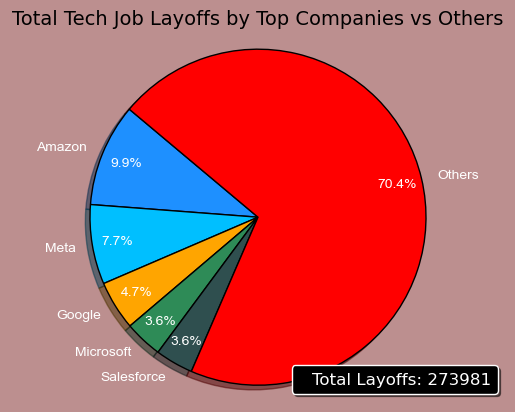

In [134]:
# Concatenate top 5 companies and the rest into a single Series
top_companies_and_rest = pd.concat([usa_top_5_layoffs, pd.Series(rest_layoffs, index=['Others'])])

# Plot the pie chart
plt.figure(facecolor='rosybrown')

# Define colors for the slices
colors = ['dodgerblue', 'deepskyblue', 'orange', 'seagreen', 'darkslategrey', 'red']

# Plot the pie chart
pie = plt.pie(top_companies_and_rest,
              labels=top_companies_and_rest.index,
              autopct='%1.1f%%',  # Display percentages
              startangle=140,
              shadow=True,
              colors=colors,
              pctdistance=0.85,
              wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True},
              textprops={'rotation': 0, 'fontname': 'Arial', 'color': 'White'}
              )

plt.title('Total Tech Job Layoffs by Top Companies vs Others', fontsize=14)
plt.axis('equal')

# Set the color of the legend marker to black
plt.legend([f'Total Layoffs: {company_layoffs.sum()}'],
           loc='lower right',
           handlelength=0,
           fontsize='large',
           facecolor='black',
           edgecolor='white',
           labelcolor='white',
           shadow=True
           )

plt.show()


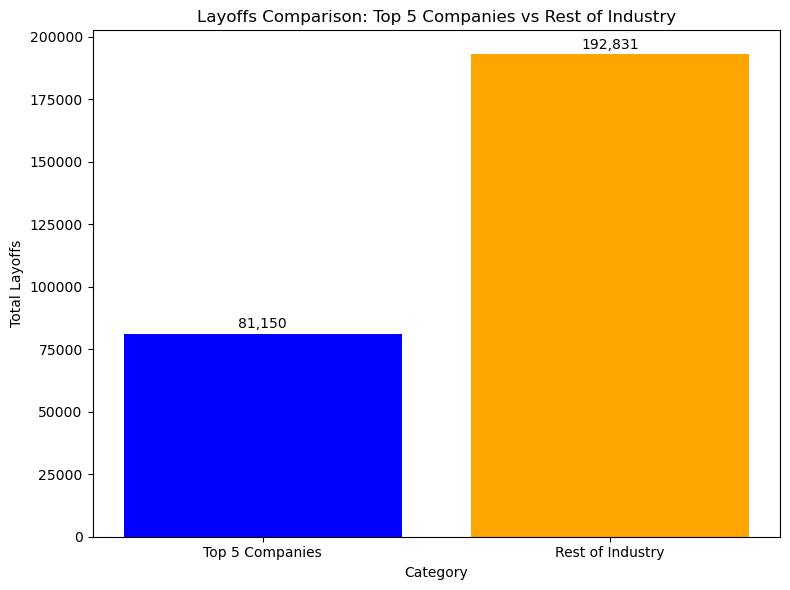

In [174]:
# Calculate the combined total of the top 5 companies
top_5_total = usa_top_5_layoffs.sum()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Top 5 Companies', 'Rest of Industry'], [top_5_total, rest_layoffs], color=['blue', 'orange'])
plt.title('Layoffs Comparison: Top 5 Companies vs Rest of Industry')
plt.xlabel('Category')
plt.ylabel('Total Layoffs')
plt.tight_layout()

# Adding data labels above each bar
for i, total in enumerate([top_5_total, rest_layoffs]):
    plt.text(i, total + 1000, f"{total:,}", ha='center', va='bottom')

plt.show()

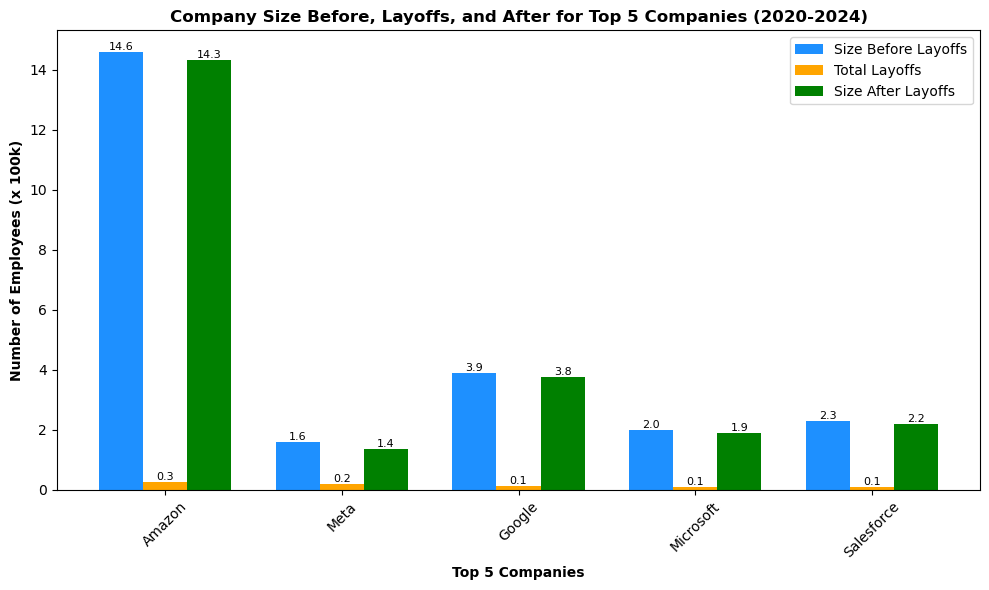

In [172]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))

# Width of each bar
bar_width = 0.25

# Position of bars on x-axis
r1 = np.arange(len(usa_top_5_layoffs))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting bars for top 5 companies' size before layoffs
bars1 = plt.bar(r1, top_5_size_before / 100000, color='dodgerblue', width=bar_width, label='Size Before Layoffs')

# Plotting bars for total layoffs
bars2 = plt.bar(r2, usa_top_5_layoffs / 100000, color='orange', width=bar_width, label='Total Layoffs')

# Plotting bars for top 5 companies' size after layoffs
bars3 = plt.bar(r3, top_5_size_after / 100000, color='green', width=bar_width, label='Size After Layoffs')

# Adding labels to the bars
plt.xlabel('Top 5 Companies', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(usa_top_5_layoffs))], usa_top_5_layoffs.index, rotation=45)
plt.ylabel('Number of Employees (x 100k)', fontweight='bold')
plt.title('Company Size Before, Layoffs, and After for Top 5 Companies (2020-2024)', fontweight='bold')
plt.legend()

# Adding values above each bar
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

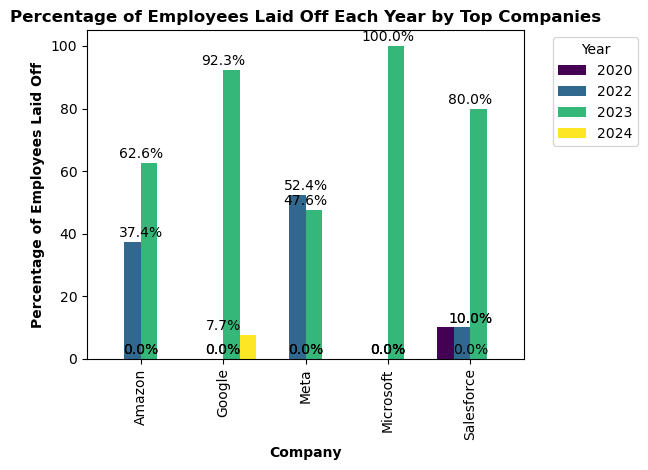

In [155]:
# Get the top companies
top_companies = usa_top_5_layoffs.index

# Filter the DataFrame to include only the top companies
df_top_companies = df_usa[df_usa['Company'].isin(top_companies)]

# Pivot the DataFrame to get the percentage of employees laid off each year for each company
df_pivot = df_top_companies.pivot_table(index='Company', columns='Year', values='Laid_Off', aggfunc='sum', fill_value=0)
df_percentage = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

# Plotting the stacked bar chart
plt.figure(figsize=(12, 8))
df_percentage.plot(kind='bar', stacked=False, colormap='viridis', width=0.8)

# Adding labels and title
plt.xlabel('Company', fontweight='bold')
plt.ylabel('Percentage of Employees Laid Off', fontweight='bold')
plt.title('Percentage of Employees Laid Off Each Year by Top Companies', fontweight='bold')

# Adding legend
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display percentages on top of each segment
for idx, company in enumerate(df_percentage.index):
    for year, percentage in enumerate(df_percentage.loc[company]):
        if percentage == 47.6:
            plt.text(idx, percentage + 5, f'{percentage:.1f}%', ha='center', va='bottom', color='black')
        else:
            plt.text(idx, percentage + 0.5, f'{percentage:.1f}%', ha='center', va='bottom', color='black')

# Adjust layout
plt.tight_layout()
plt.show()

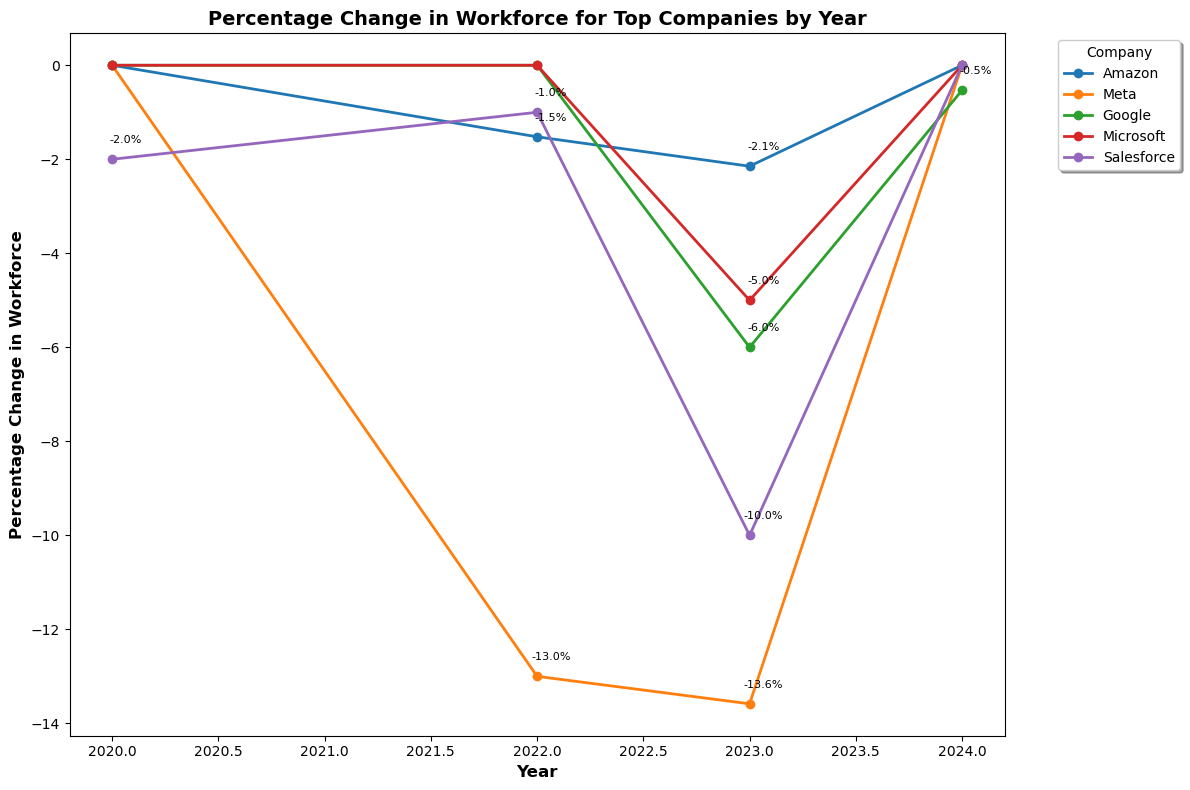

In [169]:
# Calculate the percentage change in workforce for each company for each year
df_percentage_change_yearly = (
    (df_top_companies['Company_Size_after_layoffs'] 
    - df_top_companies['Company_Size_before_Layoffs'])/df_top_companies['Company_Size_before_Layoffs']
    )* 100

df_percentage_change_yearly = df_percentage_change_yearly.groupby(
    [df_top_companies['Company'],
     df_top_companies['Year']]
     ).mean().unstack(level=0)

# Fill missing values with 0
df_percentage_change_yearly = df_percentage_change_yearly.fillna(0)

# Set color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plotting the line chart for percentage change
plt.figure(figsize=(12, 8))
for idx, company in enumerate(top_companies):
    plt.plot(df_percentage_change_yearly.index, df_percentage_change_yearly[company], label=company, color=colors[idx], linewidth=2, marker='o')



# Adding labels for each point of change
for company in top_companies:
    for year, change in df_percentage_change_yearly[company].items():
        if change != 0:  # Add annotation only if there's a change
            plt.annotate(f'{change:.1f}%', xy=(year, change), xytext=(10, 10), textcoords='offset points', ha='center', va='bottom', fontsize=8, color='black')

# Adding labels and title
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.ylabel('Percentage Change in Workforce', fontweight='bold', fontsize=12)
plt.title('Percentage Change in Workforce for Top Companies by Year', fontweight='bold', fontsize=14)

# Adding legend with shadow and rounded corners
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left', shadow=True, fancybox=True)

plt.tight_layout()
plt.show()